Task No : 5

Problem Statement : Build a machine learning model to identify fraudulent credit card transactions.Evaluate the models performance using metrics like precision, recall,and F1-score, and consider techniques like oversampling orundersampling for improving results.

In [2]:
#Import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [1]:
#Step 1:Read the dataset
import pandas as pd
df = pd.read_csv(r"C:\Datasets\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#Step 2:Perfro basic data quality checks
df.info() #To check information of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.isna().sum() #To check missing values in dataset

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.duplicated().sum() #To check duplicates

1081

In [7]:
#Step 3: Seperate cat and con features
cat = df.columns[df.dtypes==object]
con = df.columns[df.dtypes!=object]

In [8]:
cat

Index([], dtype='object')

In [9]:
con

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [10]:
#Step 4:Seperate x and y features
x = df.drop(columns=['Class'])
y = df[['Class']]


In [11]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [12]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


In [13]:
y.value_counts()

Class
0        284315
1           492
Name: count, dtype: int64

In [14]:
#Step 5: Apply Preprocessing on X
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [15]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())]).set_output(transform='pandas')

In [16]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [17]:
#Step 6: Apply train test split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.33, random_state=42)

In [18]:
xtrain.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
134955,-0.289901,0.585173,-0.050849,0.397667,0.512344,-0.287111,0.139818,-0.257495,0.155136,0.329853,...,-0.201385,-0.016408,0.302211,-0.109170,0.128461,0.926179,0.935993,-0.006876,-0.010676,-0.341355
84470,-0.726306,-0.468706,0.350477,0.770425,-0.608937,0.702241,0.363270,0.770703,0.157836,-0.788908,...,0.135170,0.140168,0.100895,-0.519487,-1.864764,1.194186,0.820254,-0.105357,0.099161,-0.062449
176085,0.585540,-1.027776,-1.975079,-0.952305,0.105453,1.981107,-1.180427,0.307911,-0.049359,0.608667,...,1.787260,0.542774,0.007890,2.645959,0.224737,-3.270975,-1.083758,-0.077810,0.738519,1.197228
79348,-0.775666,-0.391758,0.232189,0.139102,0.025007,0.042903,0.915987,-0.043138,0.601322,-1.771069,...,-0.083426,-0.198041,-0.167886,-0.038251,-2.913747,-0.115765,-0.167142,0.725433,0.340731,0.068729
63554,-0.927451,-0.417538,0.982075,0.601135,0.922173,-0.291315,0.774480,-1.594580,-4.263787,-1.429958,...,1.686350,-3.992503,-0.715891,0.311031,0.228881,1.473748,-1.203062,0.067826,0.648315,-0.239484


In [19]:
ytrain.head()

,Class
134955,0
84470,0
176085,0
79348,0
63554,0


In [20]:
xtest.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-1.122574,-8.437520,5.198899,-12.299967,6.713625,-9.993751,-2.126001,-13.500776,6.294084,-7.743333,...,-1.965076,1.621105,-1.553906,-3.776994,1.111972,-2.711992,-0.959638,-5.001031,-3.159221,1.102834
49906,-1.064538,0.173489,-1.661561,-0.088422,-0.978715,-1.051563,0.762524,-0.423881,0.187600,0.818971,...,0.656412,-0.290578,-1.298780,-0.843641,-1.910343,0.597015,-1.548333,0.101567,0.309128,1.726255
29474,-1.249364,0.714553,-0.357718,0.111208,-0.727435,-0.391095,0.030357,-0.576002,0.001925,-0.884508,...,0.276133,0.139407,0.231872,-0.266853,-1.337827,0.968934,-0.481807,0.028265,0.014039,-0.229289
276481,1.522680,-0.220592,0.997935,-1.100978,-0.246848,0.569308,-0.473363,0.223904,0.490664,-0.441200,...,-0.317325,0.488660,1.203890,-0.286074,-0.028351,-0.397853,-0.327142,-0.588125,0.005860,-0.347232
278846,1.551109,1.028319,-0.083203,-0.669967,0.231144,-0.131991,-0.718001,0.034954,-0.134589,0.330631,...,-0.331152,-0.324896,-0.849387,0.555752,0.101645,-0.690987,0.362340,-0.193353,-0.213796,-0.349671


In [21]:
ytest.head()

,Class
43428,1
49906,0
29474,0
276481,0
278846,0


In [22]:
xtrain.shape


(190820, 30)

In [23]:
xtest.shape

(93987, 30)

In [24]:
#Step 7: Start Building Decision Tree model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier(max_depth=1, 
                                min_samples_leaf=5,
                                min_samples_split=5,
                                criterion='entropy')
model1.fit(xtrain, ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_leaf=5,
                       min_samples_split=5)

In [25]:
model1.score(xtrain, ytrain)

0.9990042972434755

In [26]:
model1.score(xtest, ytest)

0.9991062593762967

In [27]:
#Step 8: Tune the Hyperparameters
params = {'max_depth':[1, 2, 3, 4, 5],
          'min_samples_split':[2, 3, 4, 5, 6, 7],
          'min_samples_leaf':[5, 6, 7, 8, 9],
          'criterion':['gini','entropy']}

In [28]:
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier()
gscv = GridSearchCV(dtc, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain, ytrain)

In [ ]:
gscv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [ ]:
best_dtc = gscv.best_estimator_
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=3)

In [ ]:
#Step 9: Evaluate the model
best_dtc.score(xtrain, ytrain)

0.9995440729483283

In [ ]:
best_dtc.score(xtest, ytest)

0.999521210380159

In [ ]:
#Step 10:Predict results for train and test
ypred_train = best_dtc.predict(xtrain)
ypred_test = best_dtc.predict(xtest)

In [ ]:
ypred_train[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [ ]:
ytrain.head()

,Class
134955,0
84470,0
176085,0
79348,0
63554,0


In [ ]:
ypred_test[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

In [ ]:
ytest.head()

,Class
43428,1
49906,0
29474,0
276481,0
278846,0


In [ ]:
#Step 11:Create a confusion matrix
best_dtc.classes_

array([0, 1], dtype=int64)

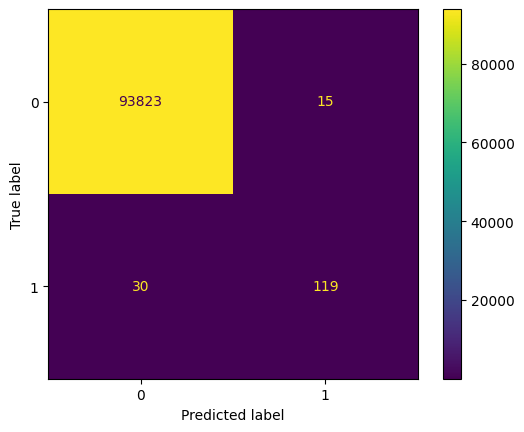

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_test)
cfd = ConfusionMatrixDisplay(cf, display_labels=best_dtc.classes_)
cfd.plot()

In [ ]:
#Step 12:Print the classification report
from sklearn.metrics import classification_report 
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.89      0.80      0.84       149

    accuracy                           1.00     93987
   macro avg       0.94      0.90      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
#Step 13:Cross Validate Score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='f1_macro')
scores

array([0.92263956, 0.89479396, 0.92411118, 0.90141076, 0.91255406])

In [ ]:
scores.mean()

0.9111019062148753

In [ ]:
cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='precision_macro').mean()

0.9541188495146704

In [ ]:
cross_val_score(best_dtc, xtrain, ytrain, cv=5, scoring='recall_macro').mean()

0.8745081176126728